# Recommendation System Experimental

In [345]:
# Importing necessary libraries

# pandas is used for data manipulation and analysis, particularly for working with tabular data (like dataframes).
import pandas as pd

# numpy is a powerful library for numerical computations, especially for handling arrays and matrices of data.
import numpy as np

# matplotlib.pyplot is a plotting library used for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# sklearn's cosine_similarity function calculates the cosine similarity between vectors, often used in text analysis to measure how similar two documents are.
from sklearn.metrics.pairwise import cosine_similarity

# TfidfVectorizer is used to convert a collection of raw documents into a matrix of TF-IDF features, commonly used in text mining.
from sklearn.feature_extraction.text import TfidfVectorizer

# os is a standard Python library used for interacting with the operating system, such as handling file paths.
import os

# scipy's sparse module provides a way to work with sparse matrices, which are matrices that are mostly empty. coo_matrix is a type of sparse matrix in COOrdinate format.
from scipy.sparse import coo_matrix

# Import spacy module, used for generating tags from the data
import spacy

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [346]:
# Read the dataset 
train_data = pd.read_csv('../data/walmart_data.tsv', sep='\t')
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [347]:
# Check the columns of train_data
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [295]:
# Filter the training data as needed
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head()

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


### EDA and Pre-processing

In [348]:
# Check the number of products and it's features
train_data.shape

(5000, 32)

In [349]:
# Check the missing values
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [350]:
# Fill missing values in the above dataset
train_data['Product Rating'].fillna(0, inplace=True)
train_data['Product Reviews Count'].fillna(0, inplace=True)
train_data['Product Category'].fillna('', inplace=True)
train_data['Product Brand'].fillna('', inplace=True)
train_data['Product Description'].fillna('', inplace=True)

In [351]:
# Recheck the missing values
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                      0
Product Brand                         0
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                   0
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [352]:
# Check for duplicates
train_data.duplicated().sum()

0

In [353]:
# Rename the columns
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [ ]:

# Code to generate the tags
# Currently already generated
# from spacy.lang.en.stop_words import STOP_WORDS

# nlp = spacy.load("en_core_web_sm")

# def clean_and_extract_tags(text):
#     doc = nlp(text.lower())
#     tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
#     return ', '.join(tags)

# columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

# for column in columns_to_extract_tags_from:
#     train_data[column] = train_data[column].apply(clean_and_extract_tags)

# # Concatenate the cleaned tags from all relevant columns
# train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [354]:
# Check the renamed values
train_data.head()

,ID,Crawl Timestamp,Dataset Origin,ProdID,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,ImageURL,Product Model Number,Tags,Contents,Rating,ReviewCount,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,0.0,0.0,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,0.0,0.0,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,0.0,0.0,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,0.0,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [355]:
# Filter out non-digit characters and convert IDs to numeric types before performing recommendation-related operations
train_data['ID'] = pd.Categorical(train_data['ID']).codes.astype(float)
train_data['ProdID'] = pd.Categorical(train_data['ProdID']).codes.astype(float)


In [356]:
# Check if removing characters created duplicate data
train_data.duplicated().sum()

0

In [357]:
# Drop duplicates if any
train_data.drop_duplicates(inplace=True)

In [360]:
train_data

,ID,Crawl Timestamp,Dataset Origin,ProdID,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,ImageURL,Product Model Number,Tags,Contents,Rating,ReviewCount,Bsr,Joining Key
0,439.0,2020-09-24 03:21:12 +0000,NaN,847.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,0.0,0.0,NaN,81350af1be98d3753cf964709f0c766a
1,2921.0,2020-10-30 14:04:08 +0000,NaN,133.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,0.0,0.0,NaN,0353e63907dc0de0c734db4690300057
2,2737.0,2020-08-06 05:51:47 +0000,NaN,2598.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,4959.0,2020-07-15 11:22:04 +0000,NaN,72.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,0.0,0.0,NaN,85b70fded09186f00467cea2f935b779
4,184.0,2020-11-26T12:27:20+00:00,NaN,3849.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,0.0,131.0,NaN,41c870871328e97da6fb036bb7d4b2da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,734.0,2020-07-21 19:00:03 +0000,NaN,3233.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e0416ae-6b70...,NaN,"Garden Mint Room Spray (Double Strength), 4 ou...",NaN,4.5,2.0,NaN,30ffe1476e6289c474ab1c08e503be4b
4996,297.0,2020-07-01 05:45:18 +0000,NaN,519.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/24d7a837-51f8...,NaN,Garnier Nutrisse Nourishing Hair Color Creme (...,NaN,3.9,7484.0,NaN,dad7562b7fb37c2f2eaf07644f0a8702
4997,1023.0,2020-12-01T02:02:32+00:00,NaN,2795.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/d6202179-2c93...,NaN,"Nail File Electric Drill, 6 in 1 Professional ...",NaN,0.0,4.0,NaN,acf460a46f2b2967ee0b0a9ae3eff7dc
4998,4992.0,2020-10-20 21:29:05 +0000,NaN,4639.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN,0.0,0.0,NaN,cd97ac9b2e21a81ea23e4bea58096df7


In [362]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 5000
Number of unique items: 4802
Number of unique ratings: 36


In [364]:
# Check the summary statistics
print("Summary Statistics:")
train_data.describe(include='all')

Summary Statistics:


,ID,Crawl Timestamp,Dataset Origin,ProdID,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,ImageURL,Product Model Number,Tags,Contents,Rating,ReviewCount,Bsr,Joining Key
count,5000.000000,5000,0.0,5000.000000,0.0,5000,139,139,139,0.0,...,5000,5000.0,5000,0.0,5000,0.0,5000.000000,5000.000000,0.0,5000
unique,NaN,4879,NaN,NaN,NaN,2,22,22,138,NaN,...,1,NaN,4945,NaN,4921,NaN,NaN,NaN,NaN,5000
top,NaN,2020-11-28T13:58:10+00:00,NaN,NaN,NaN,Competitor,Dove,Dove,Suave Professionals Shampoo Color Protection 1...,NaN,...,USD,NaN,https://i5.walmartimages.com/asr/5bef8491-d0bc...,NaN,TOM'S OF MAINE Fluoride Whitening Toothpaste F...,NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
freq,NaN,4,NaN,NaN,NaN,4861,30,30,2,NaN,...,5000,NaN,3,NaN,7,NaN,NaN,NaN,NaN,1
mean,2499.500000,NaN,NaN,2347.253400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111111111.0,NaN,NaN,NaN,NaN,1.884480,382.137000,NaN,NaN
std,1443.520003,NaN,NaN,1409.605803,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,2.192057,2050.994303,NaN,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111111111.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1249.750000,NaN,NaN,1121.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111111111.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,2499.500000,NaN,NaN,2345.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111111111.0,NaN,NaN,NaN,NaN,0.000000,3.000000,NaN,NaN
75%,3749.250000,NaN,NaN,3565.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,111111111.0,NaN,NaN,NaN,NaN,4.400000,60.250000,NaN,NaN


In [365]:
# Data types of each column
print("\nData Types:")
print(train_data.dtypes)


Data Types:
ID                                 float64
Crawl Timestamp                     object
Dataset Origin                     float64
ProdID                             float64
Product Barcode                    float64
Product Company Type Source         object
Product Brand Source                object
Product Brand Normalised Source     object
Product Name Source                 object
Match Rank                         float64
Match Score                        float64
Match Type                         float64
Retailer                            object
Category                            object
Brand                               object
Name                                object
Product Price                      float64
Sku                                float64
Upc                                float64
Product Url                         object
Market                              object
Description                         object
Product Currency                    objec

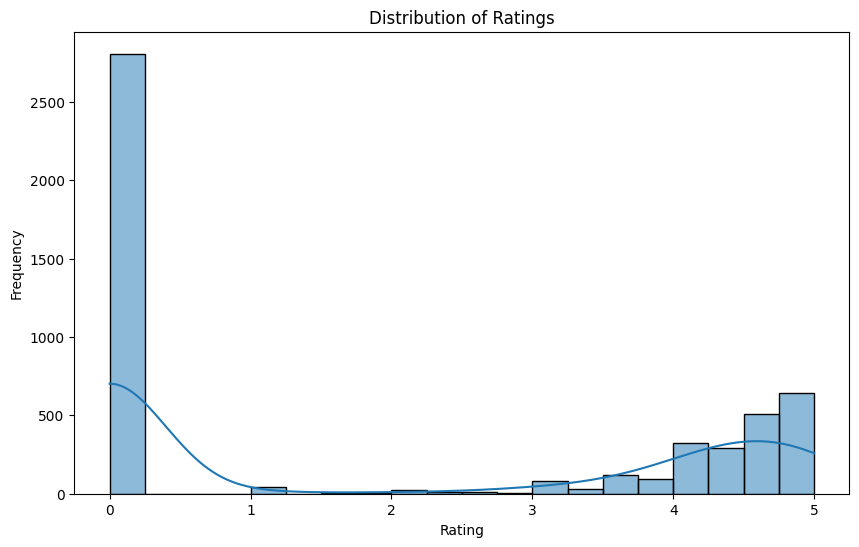

In [366]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

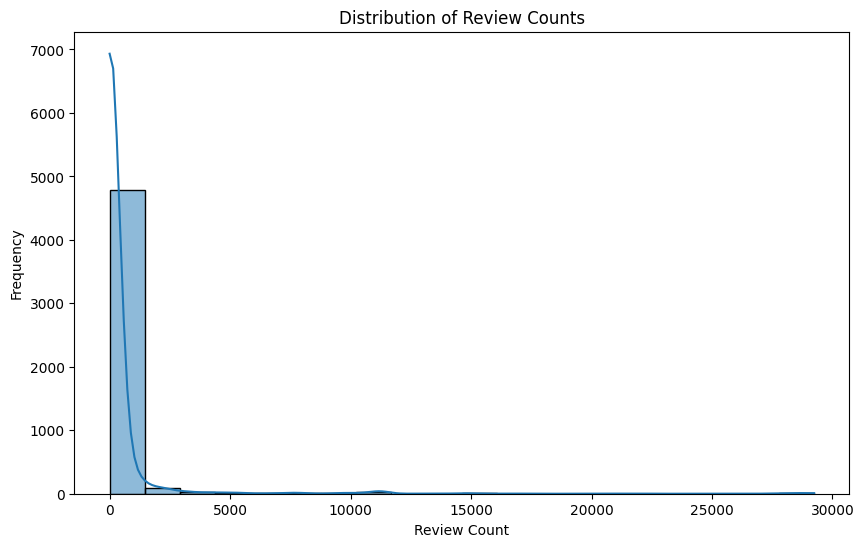

In [367]:
# Distribution of Review Counts
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ReviewCount'], bins=20, kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

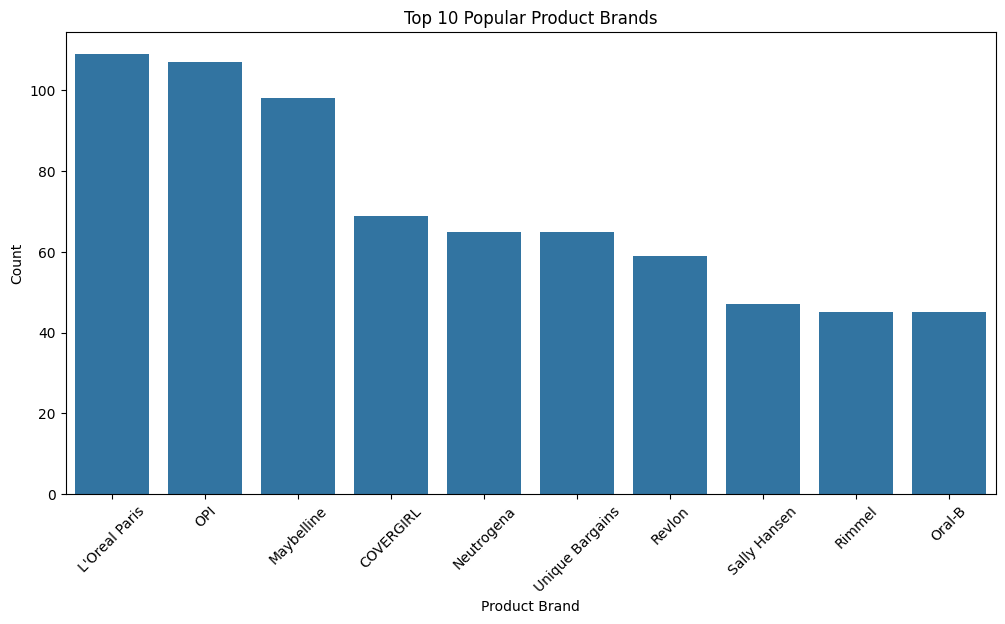

In [369]:
# Popular Product Brands (Top 10)
top_brands = train_data['Brand'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Popular Product Brands')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [315]:
# Top-Rated Products (Top 10 by Average Rating)
top_rated = train_data.groupby('ProdID')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated.index, y=top_rated.values)
plt.title('Top 10 Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()

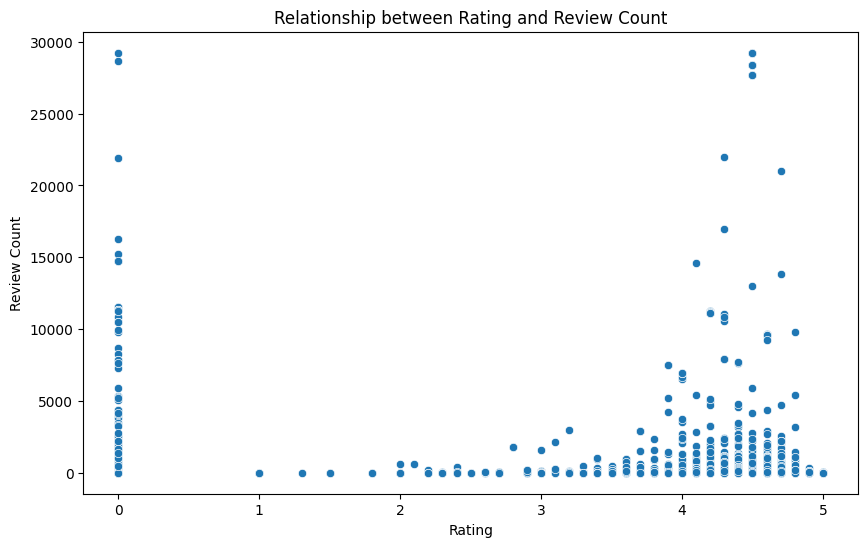

In [370]:
# Relationship between Rating and Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='ReviewCount', data=train_data)
plt.title('Relationship between Rating and Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

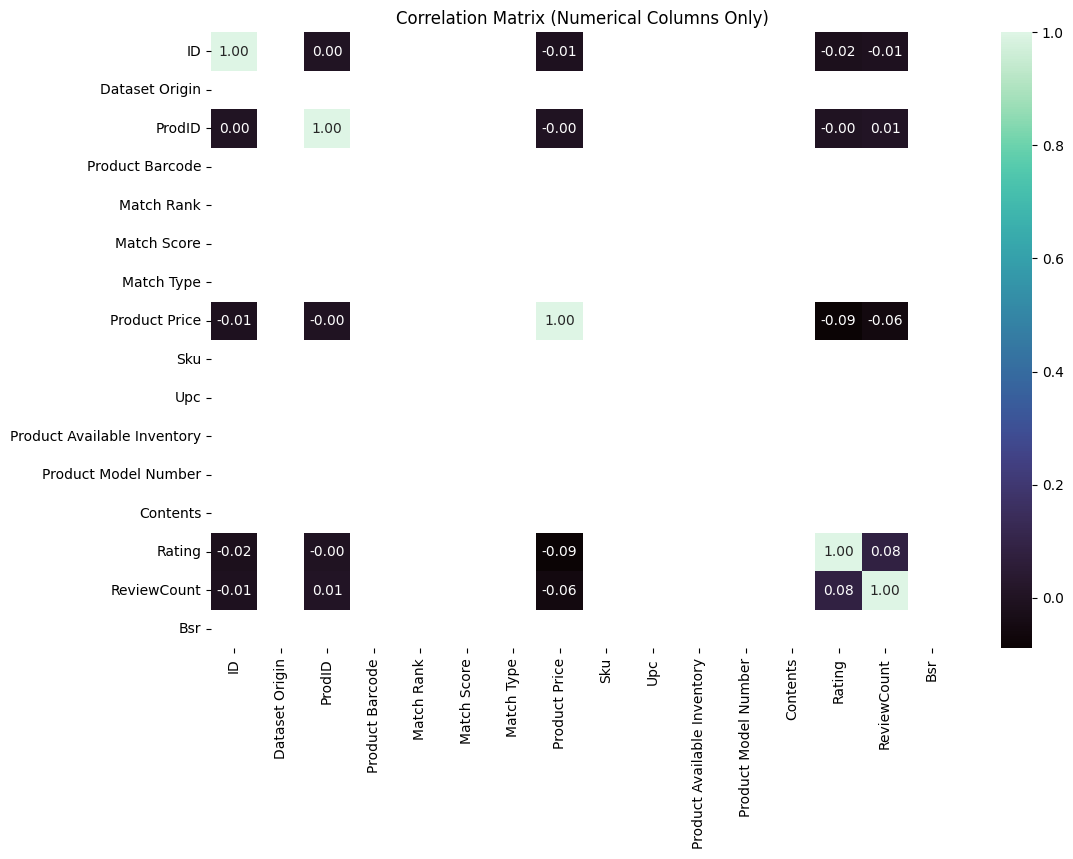

In [373]:
# Correlation Analysis

# Select only the numerical columns
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt='.2f')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()


### Rating Base Recommendations System

### To be used when the user is new and info associated with the specific user is not available

In [374]:
train_data.ProdID.nunique()

4802

In [375]:
# Create average rating grouped on the given columns
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()
average_ratings

,Name,ReviewCount,Brand,ImageURL,Rating
0,$6 Mail-In Rebate Available Braun Epilator Sil...,146.0,Braun,https://i5.walmartimages.com/asr/c7d78838-e8e2...,4.5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1.0,Peter Thomas Roth,https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5.0
2,($11 Value) Love Beauty and Planet Coconut Wat...,278.0,Love Beauty and Planet,https://i5.walmartimages.com/asr/0348d82d-2a13...,0.0
3,($125 Value) Impressions Vanity Touch Pro LED ...,2.0,Impressions Vanity,https://i5.walmartimages.com/asr/b886b154-97fd...,2.5
4,($129 Value) CHI G2 Ceramic Titanium Infused H...,23.0,CHI,https://i5.walmartimages.com/asr/9bcc0ed7-d62c...,4.4
...,...,...,...,...,...
4987,"wet n wild Photo Focus Correcting Palette, Col...",12.0,wet n wild,https://i5.walmartimages.com/asr/750275fb-ccfa...,3.3
4988,"wet n wild Photo Focus Liquid Foundation, Medi...",7827.0,wet n wild,https://i5.walmartimages.com/asr/c2c5dc7e-9bbb...,0.0
4989,"wet n wild Photo Focus Pressed Powder, Dark Café",635.0,wet n wild,https://i5.walmartimages.com/asr/57bd497f-0d5c...,4.2
4990,"wet n wild Silk Finish Lipstick, Honolulu Is C...",4259.0,wet n wild,https://i5.walmartimages.com/asr/0e25f705-a924...,3.9


In [376]:
# Get the 10 top rated products
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,Moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,Alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,Gold Bond,https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,Versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,Goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,Red Devil,https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,Air Wick,https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,Bain de Terre,https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,Long Aid,https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,Diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [377]:
# Convert columns to appropriate types
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,Moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,Alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,Gold Bond,https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,Versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,Goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,Red Devil,https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,Air Wick,https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,Bain de Terre,https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,Long Aid,https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,Diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


### Content Base Recommendation system (User Preferences or Items similarities)

### Here we do based on item similarity

In [378]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [379]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [380]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [381]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [382]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,OPI
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,OPI
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,OPI
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,OPI
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,OPI
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,OPI
3252,"OPI Nail Lacquer Nail Polish, Shorts Story",1.0,OPI


In [383]:
def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [384]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",1.0,OPI,https://i5.walmartimages.com/asr/466527fe-9e5e...,5.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",3.0,OPI,https://i5.walmartimages.com/asr/7eef48ac-3a28...,4.0
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",1.0,OPI,https://i5.walmartimages.com/asr/6cd23e3d-f3be...,5.0
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",1.0,OPI,https://i5.walmartimages.com/asr/b673df9d-cc73...,0.0
2952,"OPI Nail Lacquer Nail Polish, Miami Beet",0.0,OPI,https://i5.walmartimages.com/asr/083f9170-da65...,0.0
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,0.0,OPI,https://i5.walmartimages.com/asr/a364a6d7-0cd1...,0.0


In [386]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=10)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
3023,Be Matte Lipstick - Pink,2.0,City Color,https://i5.walmartimages.com/asr/4425a13e-085f...,3.0
558,"Kokie Professional Nail Polish, Girls Night , ...",6.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/a6f6da7a-cb11...,4.2
4920,"Kokie Professional Nail Polish, Jamacan Me Blu...",6.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/16fc0e60-1c66...,4.2
3620,"Kokie Professional Skin Perfect HD Foundation,...",9.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/2f8fcaa9-7db7...,0.0
1219,"Kokie Professional Strobing Palette, Get The Glow",0.0,Kokie Cosmetics,https://i5.walmartimages.com/asr/a23c71b9-f33a...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,L.A. Colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7


### Collaborative Filtering (User Item Similarity)

In [387]:
train_data

,ID,Crawl Timestamp,Dataset Origin,ProdID,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,ImageURL,Product Model Number,Tags,Contents,Rating,ReviewCount,Bsr,Joining Key
0,439.0,2020-09-24 03:21:12 +0000,NaN,847.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,0.0,0.0,NaN,81350af1be98d3753cf964709f0c766a
1,2921.0,2020-10-30 14:04:08 +0000,NaN,133.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,0.0,0.0,NaN,0353e63907dc0de0c734db4690300057
2,2737.0,2020-08-06 05:51:47 +0000,NaN,2598.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,4959.0,2020-07-15 11:22:04 +0000,NaN,72.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,0.0,0.0,NaN,85b70fded09186f00467cea2f935b779
4,184.0,2020-11-26T12:27:20+00:00,NaN,3849.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,0.0,131.0,NaN,41c870871328e97da6fb036bb7d4b2da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,734.0,2020-07-21 19:00:03 +0000,NaN,3233.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e0416ae-6b70...,NaN,"Garden Mint Room Spray (Double Strength), 4 ou...",NaN,4.5,2.0,NaN,30ffe1476e6289c474ab1c08e503be4b
4996,297.0,2020-07-01 05:45:18 +0000,NaN,519.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/24d7a837-51f8...,NaN,Garnier Nutrisse Nourishing Hair Color Creme (...,NaN,3.9,7484.0,NaN,dad7562b7fb37c2f2eaf07644f0a8702
4997,1023.0,2020-12-01T02:02:32+00:00,NaN,2795.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/d6202179-2c93...,NaN,"Nail File Electric Drill, 6 in 1 Professional ...",NaN,0.0,4.0,NaN,acf460a46f2b2967ee0b0a9ae3eff7dc
4998,4992.0,2020-10-20 21:29:05 +0000,NaN,4639.0,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN,0.0,0.0,NaN,cd97ac9b2e21a81ea23e4bea58096df7


In [388]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [389]:
user_item_matrix = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis=0)

In [390]:
user_similarity = cosine_similarity(user_item_matrix)

In [391]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [392]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [393]:
recommend_items = set()

for user_index in similar_user_indices:
    if len(recommend_items) >= 10:
            break

    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_index] == 0)
    recommend_items.update(user_item_matrix.columns[not_rated_by_target_user])
    recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]
    

In [394]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
68,Tinactin Athletes Foot Antifungal Treatment Cr...,5.0,Tinactin,https://i5.walmartimages.com/asr/61d435bc-333b...,4.6
332,"Hard Candy Single & Loving it Eye Shadow, Brn ...",6.0,Hard Candy,https://i5.walmartimages.com/asr/08146799-9538...,3.8
1098,Shikai - Borage Therapy Dry Skin Lotion Origin...,4.0,ShiKai,https://i5.walmartimages.com/asr/e3f4fc17-a5a7...,5.0
1338,"Herbal Essences Shampoo & Conditioner, Hello H...",2732.0,Herbal Essences,https://i5.walmartimages.com/asr/7e55725d-fce5...,4.5
1667,"e.l.f. Day to Night Lipstick Duo, Need It Nudes",271.0,e.l.f. Cosmetics,https://i5.walmartimages.com/asr/9c17d9b0-35da...,4.2
2140,V76 by Vaughn Brightening Conditioner For Silv...,10.0,V76 by Vaughn,https://i5.walmartimages.com/asr/611ac2d0-39ef...,4.9
2275,Bigen Permanent Powder Hair Color 96 Deep Burg...,1.0,Bigen,https://i5.walmartimages.com/asr/c4ee6765-9e03...,2.0
2292,"Softsoap Moisturizing Body Wash, Luminous Oils...",448.0,Softsoap,https://i5.walmartimages.com/asr/a1d1536f-15d3...,4.7
2553,LOreal Paris True Match Super-Blendable Concea...,113.0,L'Oreal Paris,https://i5.walmartimages.com/asr/6568f252-55c2...,4.4
4202,Redken-Diamond Oil Glow Dry Detangling Conditi...,334.0,Redken,https://i5.walmartimages.com/asr/f200009c-1f8f...,4.5


In [395]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Normalize the user-item matrix (optional but recommended)
    user_item_matrix = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis=0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = set()

    for user_index in similar_users_indices:
        if len(recommended_items) >= top_n:
            break

        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.update(user_item_matrix.columns[not_rated_by_target_user])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(top_n)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
68,Tinactin Athletes Foot Antifungal Treatment Cr...,5.0,Tinactin,https://i5.walmartimages.com/asr/61d435bc-333b...,4.6
332,"Hard Candy Single & Loving it Eye Shadow, Brn ...",6.0,Hard Candy,https://i5.walmartimages.com/asr/08146799-9538...,3.8
1098,Shikai - Borage Therapy Dry Skin Lotion Origin...,4.0,ShiKai,https://i5.walmartimages.com/asr/e3f4fc17-a5a7...,5.0
1338,"Herbal Essences Shampoo & Conditioner, Hello H...",2732.0,Herbal Essences,https://i5.walmartimages.com/asr/7e55725d-fce5...,4.5
1667,"e.l.f. Day to Night Lipstick Duo, Need It Nudes",271.0,e.l.f. Cosmetics,https://i5.walmartimages.com/asr/9c17d9b0-35da...,4.2
2140,V76 by Vaughn Brightening Conditioner For Silv...,10.0,V76 by Vaughn,https://i5.walmartimages.com/asr/611ac2d0-39ef...,4.9
2275,Bigen Permanent Powder Hair Color 96 Deep Burg...,1.0,Bigen,https://i5.walmartimages.com/asr/c4ee6765-9e03...,2.0
2292,"Softsoap Moisturizing Body Wash, Luminous Oils...",448.0,Softsoap,https://i5.walmartimages.com/asr/a1d1536f-15d3...,4.7
2553,LOreal Paris True Match Super-Blendable Concea...,113.0,L'Oreal Paris,https://i5.walmartimages.com/asr/6568f252-55c2...,4.4
4202,Redken-Diamond Oil Glow Dry Detangling Conditi...,334.0,Redken,https://i5.walmartimages.com/asr/f200009c-1f8f...,4.5


### Hybrid Recommendations

In [396]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [397]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,OPI,https://i5.walmartimages.com/asr/b51a716d-565c...,0.0
545,OPI Nail Lacquer Polish .5oz/15mL - Sweet Hear...,0.0,OPI,https://i5.walmartimages.com/asr/136eb3a3-1668...,0.0
3852,OPI Nail Lacquer Polish .5oz/15mL - A-taupe th...,1.0,OPI,https://i5.walmartimages.com/asr/4b895a60-06c2...,0.0
1594,Nail Lacquer - # NL E74 Youre Such a BudaPest ...,5.0,OPI,https://i5.walmartimages.com/asr/bb6e42b8-35ee...,5.0
4645,OPI Nail Lacquer Polish .5oz/15mL - Champagne ...,0.0,OPI,https://i5.walmartimages.com/asr/5f4ec827-6edc...,0.0
4109,OPI Nail Lacquer Polish .5oz/15mL - Girls Love...,0.0,OPI,https://i5.walmartimages.com/asr/6d70f6db-0442...,0.0
4310,OPI Nail Lacquer Polish .5oz/15mL - So Many Cl...,0.0,OPI,https://i5.walmartimages.com/asr/b24090e9-9cf9...,0.0
3719,OPI Nail Lacquer Polish .5oz/15mL - Ski Slope ...,0.0,OPI,https://i5.walmartimages.com/asr/8466cc9b-40da...,0.0
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz",2.0,OPI,https://i5.walmartimages.com/asr/bb0c5e20-0ead...,3.0
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid",1.0,OPI,https://i5.walmartimages.com/asr/cef5a3ca-dfed...,4.0


In [344]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,Black Radiance,https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,Black Radiance,https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
2136,"Black Radiance Brilliant Effects Lip Gloss, Bl...",95.0,Black Radiance,https://i5.walmartimages.com/asr/f6784519-2c86...,4.4
3140,Laura Mercier Tone Perfecting Eye Gel Crème 0....,11.0,Laura Mercier,https://i5.walmartimages.com/asr/9cd9aea3-5ac3...,3.7
398,"IMAN Skin Tone Evener BB Crème, Light Sand",19.0,IMAN Cosmetics,https://i5.walmartimages.com/asr/b387123b-700d...,3.9
3885,Two-Tone Comfort Yoga Mat,0.0,EDX,https://i5.walmartimages.com/asr/75ebb9e7-07eb...,0.0
4589,"Revlon ColorStay Longwear Lip Liner, 665 Plum,...",1678.0,Revlon,https://i5.walmartimages.com/asr/075c59a0-3a35...,0.0
725,"LOreal Paris Colour Riche Lip Liner, Lasting P...",85.0,L'Oreal Paris,https://i5.walmartimages.com/asr/194b6bcc-6cd6...,4.4
680,Revlon Revlon Super Lustrous Lipstick with Vit...,2031.0,Revlon,https://i5.walmartimages.com/asr/f21188e6-b3ef...,4.4
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,L'Oreal Paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
